In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [2]:
data = pd.read_csv("framingham.csv")

<AxesSubplot:>

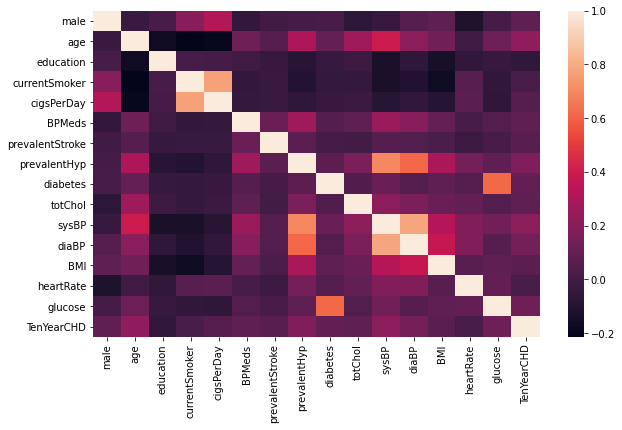

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

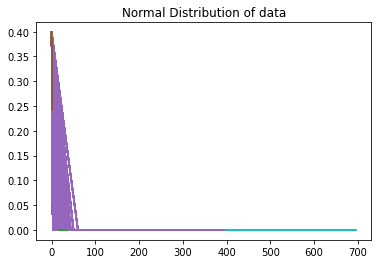

In [4]:
plt.plot(data, scipy.stats.norm.pdf(data,0,1))
plt.title("Normal Distribution of data")
plt.show()

So this means that our data is left skewed. For now we have to standardize our data

In [5]:
data = data.fillna(data.mean())

In [6]:
X = data[['cigsPerDay', 'prevalentHyp','currentSmoker','sysBP','diaBP']].values
y = data['diabetes'].values

In [7]:
sca = StandardScaler()
scaled_data = sca.fit_transform(X)

In [8]:
m,n = X.shape

In [9]:
theta = np.ones(n)

In [10]:
learning_rate = 0.001
epochs = 6000

def new_gradient_descent(theta):
    for i in range(epochs):
        hypothesis = np.dot(scaled_data, theta.T)
        sigmoid = 1/(1 + np.exp(-hypothesis))
        cost = -((1/m) * np.sum(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid)))
        derivative = (1/m) * np.dot((sigmoid - y),scaled_data)
        theta = theta - (learning_rate * derivative)
    return (theta, cost, hypothesis)

In [11]:
(theta, cost, hypothesis) = new_gradient_descent(theta)
sigmoid = 1/(1 + np.exp(-hypothesis))

In [12]:
sigmoid

array([0.34426411, 0.38811012, 0.54550325, ..., 0.53398682, 0.54411426,
       0.41118742])

In [13]:
prediction = [1 if i > 0.5 else 0 for i in sigmoid]

In [14]:
cost

0.7119191385029764